# MASA Hackathon 2022

## Load Library

In [24]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

In [25]:
# Format code to pep8 standard
# Type in terminal: autopep8 --in-place -a -a Testing01.ipynb

## Sprint 0: Understanding the Data Set

In [26]:
# Read data
df = pd.read_csv('Dataset/Travel Insurance.csv')

In [27]:
# First five rows of the data
df.head()


,Agency,AgencyType,DistributionChannel,ProductName,Claim,Duration,Destination,NetSales,Commission,Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


In [28]:
# Data info
datainfo = df.shape
print("Data info:\nTotal number of rows = {}  \
    \nTotal number of columns = {}".format(datainfo[0], datainfo[1]))

datainfo2 = df.columns
print('Total number of variables = ',len(datainfo2))

Data info:
Total number of rows = 63326      
Total number of columns = 11
Total number of variables =  11


In [29]:
# Numerical data info
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Duration,63326.0,49.317074,101.791566,-2.0,9.0,22.00,53.00,4881.0
NetSales,63326.0,40.702018,48.845637,-389.0,18.0,26.53,48.00,810.0
Commission,63326.0,9.809992,19.804388,0.0,0.0,0.00,11.55,283.5
Age,63326.0,39.969981,14.017010,0.0,35.0,36.00,43.00,118.0


In [30]:
# The count and data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Agency               63326 non-null  object 
 1   AgencyType           63326 non-null  object 
 2   DistributionChannel  63326 non-null  object 
 3   ProductName          63326 non-null  object 
 4   Claim                63326 non-null  object 
 5   Duration             63326 non-null  int64  
 6   Destination          63326 non-null  object 
 7   NetSales             63326 non-null  float64
 8   Commission           63326 non-null  float64
 9   Gender               18219 non-null  object 
 10  Age                  63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


In [31]:
df.columns

Index(['Agency', 'AgencyType', 'DistributionChannel', 'ProductName', 'Claim',
       'Duration', 'Destination', 'NetSales', 'Commission', 'Gender', 'Age'],
      dtype='object')

In [32]:
# Unique variables
print("Number of unique variables in Agency = ",len(df.Agency.value_counts()))
print("Number of unique variables in Agency Type = ",len(df.AgencyType.value_counts()))
print("Number of unique variables in Distribution Channel = ",len(df.DistributionChannel.value_counts()))
print("Number of unique variables in Product Name = ",len(df.ProductName.value_counts()))
print("Number of unique variables in Claim = ",len(df.Claim.value_counts()))
print("Number of unique variables in Duration = ",len(df.Duration.value_counts()))
print("Number of unique variables in Destination = ",len(df.Destination.value_counts()))
print("Number of unique variables in Net Sales = ",len(df.NetSales.value_counts()))
print("Number of unique variables in Commission = ",len(df.Commission.value_counts()))
print("Number of unique variables in Gender = ",len(df.Gender.value_counts()))
print("Number of unique variables in Age = ",len(df.Age.value_counts()))

Number of unique variables in Agency =  16
Number of unique variables in Agency Type =  2
Number of unique variables in Distribution Channel =  2
Number of unique variables in Product Name =  26
Number of unique variables in Claim =  2
Number of unique variables in Duration =  455
Number of unique variables in Destination =  149
Number of unique variables in Net Sales =  1139
Number of unique variables in Commission =  1035
Number of unique variables in Gender =  2
Number of unique variables in Age =  89


# Sprint 2: Statistical Test

## Simple linear regression analysis

### Relationship between Duration & Net Sales

In [33]:
# Make a copy of data
# Keep Duration & Net Sales only
dftest1_features = ['Duration','NetSales']
dftest1 = df[dftest1_features]

# Check deleted columns
dftest1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  63326 non-null  int64  
 1   NetSales  63326 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 989.6 KB


Estimated coefficients:
b_0 = 30.54406602637408            
b_1 = 0.2059723177332796


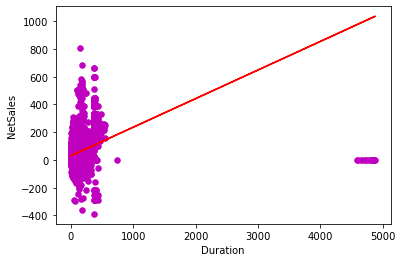

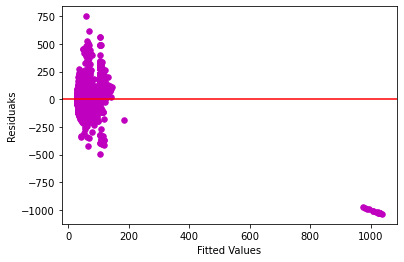

In [34]:
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
  
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
  
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
  
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
  
    return (b_0, b_1)
  
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
  
    # predicted response vector
    y_pred = b[0] + b[1]*x
  
    # plotting the regression line
    plt.plot(x, y_pred, color = "r")
  
    # putting labels
    plt.xlabel(x.name)
    plt.ylabel(y.name)
  
    # function to show plot
    plt.show()

def plot_residuals_against_fitted_values(x,y,b):
    # predicted response vector
    y_pred = b[0] + b[1]*x

    # calculate residuals
    residuals = y - y_pred
    
    # plotting the residuals against the fitted values as scatter plot
    plt.scatter(y_pred, residuals, color = "m",
               marker = "o", s = 30)

    # putting labels
    plt.xlabel('Fitted Values')
    plt.ylabel('Residuaks')

    #plot a straight line y=0
    plt.axhline(y=0, color='r', linestyle='-')

    # function to show plot
    plt.show()
  
  
def main():
    # observations / data
    x = dftest1['Duration']
    y = dftest1['NetSales']
  
    # estimating coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))
  
    # plotting regression line
    plot_regression_line(x, y, b)

    # checking assumptions
    plot_residuals_against_fitted_values(x,y,b)
  
if __name__ == "__main__":
    main()

There seems to be a weak positive correlation between duration and net sales if the outliers are ignored. The assumption that the residuals are normally distributted, independent and have a constant varience is checked.

## Multiple linear regression analysis

### Relationship between Age & Duration & Net Sales

Text(0.5, 0, 'Net Sales')

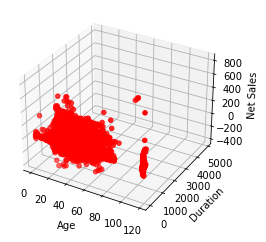

In [38]:
from mpl_toolkits.mplot3d import Axes3D

dftest2_features = ['Age','Duration']
X = df[dftest2_features]
y = df.NetSales

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

x1 = X['Age']
x2 = X['Duration']

ax.scatter(x1,x2,y,c='red',marker='o')

ax.set_xlabel('Age')
ax.set_ylabel('Duration')
ax.set_zlabel('Net Sales')

There seems to be no correletion between age and duration, while the relationship between age and net sales is random.

In [39]:
from sklearn.linear_model import LinearRegression

mlr_model = LinearRegression()
mlr_model.fit(X,y)

LinearRegression()

In [40]:
theta0 = mlr_model.intercept_
theta1, theta2 = mlr_model.coef_
theta0,theta1,theta2

(25.4349084708817, 0.1278785007368896, 0.205928850934094)

In [41]:
# Testing my prediction
y_pred = mlr_model.predict([[50,500]])
y_pred

array([134.79325897])